In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

/tmp/ipykernel_91300/1505719282.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_csv('./assets/employees.csv')

In [4]:
df

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
...,...,...,...,...,...,...,...,...
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [5]:
check_nan = df.isnull().any()
check_nan

First Name            True
Gender                True
Start Date           False
Last Login Time      False
Salary               False
Bonus %              False
Senior Management     True
Team                  True
dtype: bool

In [6]:
delete_nan = df.dropna()
delete_nan

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
...,...,...,...,...,...,...,...,...
994,George,Male,6/21/2013,5:47 PM,98874,4.479,True,Marketing
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development


In [7]:
delete_nan.isnull().values.any()

False

In [8]:
team_counts = delete_nan.groupby(['Team']).count()
team_counts

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management
Team,,,,,,,
Business Development,88,88,88,88,88,88,88
Client Services,85,85,85,85,85,85,85
Distribution,60,60,60,60,60,60,60
Engineering,79,79,79,79,79,79,79
Finance,80,80,80,80,80,80,80
Human Resources,76,76,76,76,76,76,76
Legal,67,67,67,67,67,67,67
Marketing,74,74,74,74,74,74,74
Product,83,83,83,83,83,83,83


In [26]:
team_info = delete_nan.groupby('Team')['Salary'].agg(['min', 'mean', 'max']).sort_values(by='mean')
team_info

,min,mean,max
Team,,,
Distribution,35575,85849.100000,149105
Product,35013,86935.963855,149684
Legal,35061,88066.402985,148985
Client Services,35095,89336.658824,147183
Business Development,36844,90520.397727,147417
Marketing,36643,90764.081081,146812
Human Resources,35203,91145.171053,149903
Sales,35802,91724.819444,144887
Engineering,36946,94369.405063,147362


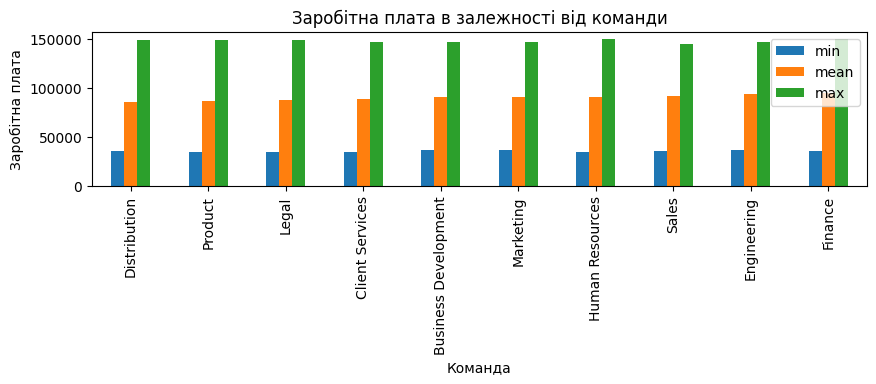

In [39]:
team_info.plot(kind='bar', figsize=(10, 2))
plt.title('Заробітна плата в залежності від команди')
plt.xlabel('Команда')
plt.ylabel('Заробітна плата')
plt.show()

In [50]:
gender_bonus_avg = delete_nan.groupby('Gender')['Bonus %'].median()
gender_bonus_avg

Gender
Female     9.375
Male      10.169
Name: Bonus %, dtype: float64

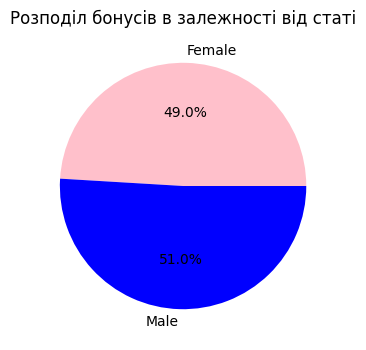

In [48]:
gender_bonus_avg.plot(kind='pie', autopct='%1.1f%%', colors=['pink', 'blue'], figsize=(10, 4), legend=False)
plt.title('Розподіл бонусів в залежності від статі')
plt.ylabel('')
plt.show()